# توجه 

1. به راهنمایی هایی که در کد آمده است توجه کنید
2. مواردی که به صورت "#TODO"
را باید بصورتی که در صورت پروژه تعریف شده است انجام دهید. 

In [1]:
! pip install hazm
! pip install gensim==4.1.2
# !pip install words
!pip install elasticsearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 29.7 MB/s 
     |████████████████████████████████| 233 kB 55.1 MB/s 
     |████████████████████████████████| 1.4 MB 46.0 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394489 sha256=016a91112bcd57d4d3945f0d7da52a5424ac0ca80ab82cd6a90fe0b7df0ed481
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=153514 sha256=592390febcd9c12059ebede0ec8b52831657a35926b9fef5592344ecf632ecae
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Looking in indexes: https:/

In [3]:
!pip install parsivar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.2 MB 272 kB/s 
     |████████████████████████████████| 1.5 MB 57.7 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=144857db2da01b3060abd78092bdb14d35cdffbb64ac9c460d4c7761d84db173
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449924 sha256=d7c8062c69fa56714d4bec038a5ff1df419c49185372f171e1a391d521b0afed
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.3
    Uninstalling nltk-3.3:
      Successfully uninstalled nltk-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [2]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import json
from tqdm import tqdm
from gensim.models import Word2Vec
import numpy as np
import random
import pandas as pd

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# step 1 
داده هایی که در اختیار دارید را بارگذاری کنید و مشابه بخش های قبل پیش پردازش های لازم را انجام دهید. 
مطابق فازهای و بخش های پیشین پروژه مراحل پیش پردازش را انجام دهید. در نهایت لیست از اسناد بسازید که برای هر متن شامل توکن های آن متن باشد. 
این لیست میتواند ساختاری مطابق تصویر زیر داشته باشد.
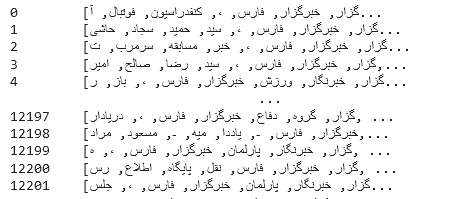

# گام دوم 
در این گام شما باید بتوانید که هر سند را به یک بردار عددی تبدیل کنید. این کار را به کمک ماژول آماده ایی که در اختیار شما قرار گرفته است انجام می شود.
بدین منظور مراحل زیر را انجام دهید. 










دو بلوک بعدی کد برای استفاده از ماژول آماده تهیه شده و صرفا به شکل مثال نوشته شده اند، ممکن است برای استفاده عملی در پروژه نیاز به تغییر باشد. 

In [4]:
def read_json(path):
    json_file = open(path)
    json_data = json.load(json_file)
    return json_data

In [5]:
def get_documents(data):
    documents = []
    for i in data:
        documents.append(data[i]['content'])
    return documents

In [7]:
!gdown --id 1Ebu4D7hcSeb7xixgqA7-vtHdLPHGhPLt

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Ebu4D7hcSeb7xixgqA7-vtHdLPHGhPLt
To: /content/IR_data_news_12k.json
100% 132M/132M [00:01<00:00, 76.3MB/s]


In [8]:
json_data = read_json('IR_data_news_12k.json')
documents = get_documents(json_data)

In [9]:
from parsivar import Normalizer, Tokenizer, FindStems
from hazm import stopwords_list

def preprocess(docs, remove_stop_words, stemming_flag):

    normalizer = Normalizer()
    tokenizer = Tokenizer()
    stemmer = FindStems()
    documents_tokens = []
    
    for document in docs:

        normalized_doc = normalizer.normalize(document)

        tokens = tokenizer.tokenize_words(normalized_doc)
        translation_table = str.maketrans('', '', "><.،؟؛:{}\|+ـ()*&^٪$#❊/[]=-«»")
        
        final_tokens = []
        for token in tokens:
            token = token.translate(translation_table)
            
            if token == '':
                continue
                
            if stemming_flag:
                token = stemmer.convert_to_stem(token)
            
            if remove_stop_words:
                if token in stopwords_list():
                    continue
            
            final_tokens.append(token)
            
        documents_tokens.append(final_tokens)
        
    return documents_tokens



In [10]:
documents_tokens = preprocess(documents, remove_stop_words=True, stemming_flag=True)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pickle
file = open("/content/drive/MyDrive/data/preprocessed_12k.txt","wb")
pickle.dump(documents_tokens, file)
file.close()

In [18]:
file = open("/content/drive/MyDrive/data/preprocessed_12k.txt","rb")
documents_tokens = pickle.load(file)
file.close()

In [20]:
!gdown --id 17lOpM6fiVhbFcJ_AJbOFI6PL-U6dF1P5

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17lOpM6fiVhbFcJ_AJbOFI6PL-U6dF1P5
To: /content/embeding.py
100% 3.03k/3.03k [00:00<00:00, 5.76MB/s]


In [21]:
from  embeding import * 
# dataset: each document is a list of its tokens. 
# model_path: is a path that you want save model in it. 
doc2vec = DocToVec(documents_tokens , vec_size = 200 , model_path = 'word2vec.model')


There is no pre-trained model. Going to train a model ...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



تولید بردارهای تمام اسناد و ذخیره در یک لیست بمنظور استفاده در گام های بعدی 

In [22]:
%%time
doc_vectors = []
for i in tqdm(range(len(documents))):
    doc_vectors.append(doc2vec.embed(documents_tokens[i])) 

100%|██████████| 12202/12202 [00:30<00:00, 403.64it/s]

CPU times: user 29.7 s, sys: 661 ms, total: 30.4 s
Wall time: 30.2 s


# ابتدا بردارهای عددی داده های تست را بدست آورده و سپس از این بردارها برای تولید بردار  بقیه ی داده ها استفاده کنید. 

In [23]:
mapping = { 
    "mappings": {
        "properties": {
          "content": {
            "type": "text"
          },
            "category":{
                "type": "keyword"
            },
            "vec":{
                "type": "dense_vector",
                "dims": 200,
                "index": True,
                "similarity": "cosine"
            }
        }
    }
}

In [24]:
ELASTIC_PASSWORD = "GFXPlPEZn9gd83s9y7k2L0s6"

# Found in the 'Manage Deployment' page
CLOUD_ID = "My_deployment:dXMtY2VudHJhbDEuZ2NwLmNsb3VkLmVzLmlvOjQ0MyQzMjRhOTRkN2Y5Yzc0OWMxYTEzMTAxZWMzMjNkOWZmMCQ2NTgxZmFmNWU5M2I0YTM5OTU3NzQ3NWI2NmQyZDY4NA=="

# Create the client instance
es = Elasticsearch(
    cloud_id=CLOUD_ID,
    basic_auth=("elastic", ELASTIC_PASSWORD)
)

# Successful response!
es.info()

ObjectApiResponse({'name': 'instance-0000000001', 'cluster_name': '324a94d7f9c749c1a13101ec323d9ff0', 'cluster_uuid': 'RTEgMOWISVWyHPEP4Zc8iw', 'version': {'number': '8.3.1', 'build_type': 'docker', 'build_hash': 'b9a6b2867996ba92ceac66cb5bafc6db25e7910e', 'build_date': '2022-06-29T18:39:55.731992798Z', 'build_snapshot': False, 'lucene_version': '9.2.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [ ]:
# es = Elasticsearch("http://localhost:9200")

In [25]:
index_name = 'ir_knn'

In [26]:
# Delete index if one does exist
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)

# Create index
es.indices.create(index=index_name, body=mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  


ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'ir_knn'})

In [29]:
!gdown --id 1N3LSoeUV6C4Hd84LX8Bb_Noi3QX7u33H

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1N3LSoeUV6C4Hd84LX8Bb_Noi3QX7u33H
To: /content/IR01_3_test_4k.xlsx
100% 3.93M/3.93M [00:00<00:00, 282MB/s]


In [30]:
data = pd.read_excel("IR01_3_test_4k.xlsx")

In [31]:
from copy import deepcopy
data_tmp = []
for i in tqdm(range(len(data))):
#     tmp_doc = data[f'{i}']
    tmp_doc = data.iloc[i]
    doc = {}
    # filter_doc: method for preprocessing a doc. 
#     doc['content'] = " ".join(filter_doc(tmp_doc['content']))
    doc['content'] = " ".join(preprocess(list(tmp_doc['content']), remove_stop_words=True, stemming_flag=True)[0])
    doc['vec'] = list(doc_vectors[i])
    doc['category'] = tmp_doc['category']
    data_tmp.append(doc)


100%|██████████| 4022/4022 [58:07<00:00,  1.15it/s]


In [32]:
import pickle
file = open("/content/drive/MyDrive/data/data_tmp.txt","wb")
pickle.dump(documents_tokens, file)
file.close()

In [33]:
file = open("/content/drive/MyDrive/data/data_tmp.txt","rb")
data_tmp = pickle.load(file)
file.close()

In [62]:
len(data_tmp)

12202

In [ ]:
data_bulk = [
    {
        "_index" : index_name,
        "_id" : i + 1,
        "_source": data_tmp[i]
    }
    for i in range(len(data_tmp))
]

def doc_generator(data):
    for i in range(len(data)):
        yield     {
            "_index" : index_name,
            "_id" : i + 1,
            "_source": data_tmp[i]
            }

resp = helpers.bulk(
  es,
  data_bulk,
  index = index_name
)
# resp = helpers.bulk(
#   es,
#   doc_generator(data_tmp),
#   index = index_name
# )
print(resp)

# گام سوم

در این بخش باید داده های تست را بارگذاری و پیش پردازش کنید و سپس برای هر متن بردار آن را بدست آورده و به روش  نزدیکترین همسایه جستجو را انجام داده و برچسب این سند را بدست آورید. 

In [ ]:
!gdown --id 1M_NHmG2Z7N30Ahr7gpAx89a88ujfN0zo

In [ ]:
test_dataset = pd.read_excel("IR01_3_46k.xlsx")

In [ ]:
res = []
for i in tqdm(range(len(test_dataset))):
    tmp_doc = data.iloc[i]
    tokens = preprocess(list(tmp_doc['content']), remove_stop_words=True, stemming_flag=True)[0]
    vec = list(doc2vec.embed(tokens))
    try:
        resp = es.knn_search(index=index_name,knn={
            "field" : "vector",
            "query_vector" : vec,
            "k" : 5,
            "num_candidate" : 100
          }
          ,source=['content','category'],)
      #  predict label for doc
        res_dict = {}
        for result in resp['hits']['hits']:
            if result['_source']['category'] not in res_dict:
                res_dict[result['_source']['category']] = 0
            res_dict[result['_source']['category']] += 1
        res_dict = dict(sorted(res_dict.items(), key=lambda item: item[1], reverse=True))
        test_dataset['category'][i] = list(res_dict.keys())[0]
            
    except:
        # usualy happens when all the elements of 
        # the vector are zero.
        pass

# گام چهارم 

حال که برای هر متن برچسب آن را بدست آورده اید. متون هر دسته را به نحوی از سایر دسته ها مجزا کنید و مطابق موارد خواسته شده در گزارش جستجو را در دسته های مختلف انجام دهید. 

In [ ]:
query= {
        "bool": {
          "must": [
              { 
                  "match": {
                      "content":"نتایج مسابقات لیگ برتر فوتبال ایران"
                  }

              }, 
              
              {
                  "match": {
                      "category":  "sport"
                  }
              },
   
          ],
        },
    }

res = es.search(index = index_name, query=query, _source= ["url"])
res = dict(res)
print("{} results in {} s: ".format(res['hits']['total']['value'] ,res['took']/1000))
for doc in res['hits']['hits']:
    print(doc['_source']['url'])

In [ ]:
query= {
        "bool": {
          "must": [
              { 
                  "match": {
                      "content":"افزایش قیمت دلار"
                  }

              }, 
              
              {
                  "match": {
                      "category":  "economy"
                  }
              },
   
          ],
        },
    }

res = es.search(index = index_name, query=query, _source= ["url"])
res = dict(res)
print("{} results in {} s: ".format(res['hits']['total']['value'] ,res['took']/1000))
for doc in res['hits']['hits']:
    print(doc['_source']['url'])

In [ ]:
query= {
        "bool": {
          "must": [
              { 
                  "match": {
                      "content":"درمان ویروس کرونا"
                  }

              }, 
              
              {
                  "match": {
                      "category":  "health"
                  }
              },
   
          ],
        },
    }

res = es.search(index = index_name, query=query, _source= ["url"])
res = dict(res)
print("{} results in {} s: ".format(res['hits']['total']['value'] ,res['took']/1000))
for doc in res['hits']['hits']:
    print(doc['_source']['url'])